<a href="https://colab.research.google.com/github/iqbalhanif/NN-with-Keras/blob/master/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-25 14:11:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.22MB/s    in 54s     

2020-07-25 14:11:55 (5.75 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os, shutil
#shutil.rmtree('/tmp/rockpaperscissors/') 

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



In [ ]:
import os, shutil

# Path to the directory where the original dataset was uncompressed
original_dataset_dir = '/tmp/rockpaperscissors/'

# Directory where you’ll store your smaller dataset
base_dir = '/tmp/rockpaperscissors/data'

os.mkdir(base_dir)

# Directory for the training splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# Directory for the test splits
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with training rock pictures
train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)

# Directory with training paper pictures
train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

# Directory with training scissors pictures
train_scissors_dir = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors_dir)

# Directory with Test Rock Pictures
test_rock_dir = os.path.join(test_dir, 'rock')
os.mkdir(test_rock_dir)

# Directory with Test Paper Pictures
test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)

# Directory with Test Scissors Pictures
test_scissors_dir = os.path.join(test_dir, 'scissors')
os.mkdir(test_scissors_dir)



In [ ]:
print(len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock')))
print(726 * 60 / 100)
print(726 * 40 / 100)

726
435.6
290.4


In [ ]:
print(len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper')))
print(712 * 60 / 100)
print(712 * 40 / 100)

712
427.2
284.8


In [ ]:
print(len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/scissors')))
print(750 * 60 / 100)
print(750 * 40 / 100)

750
450.0
300.0


In [ ]:
# Copies rock images to train_rock_dir. 
fnames = os.listdir('/tmp/rockpaperscissors/rock')
for fname in fnames[0:436]:
    src = os.path.join(original_dataset_dir, 'rock', fname)
    dst = os.path.join(train_rock_dir, fname)
    shutil.copyfile(src, dst)

# Copies rock images to test_rock_dir
fnames = os.listdir('/tmp/rockpaperscissors/rock')
for fname in fnames[436:727]:
    src = os.path.join(original_dataset_dir, 'rock', fname)
    dst = os.path.join(test_rock_dir, fname)
    shutil.copyfile(src, dst)

print(len(os.listdir('/tmp/rockpaperscissors/data/train/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/data/test/rock')))

436
290


In [ ]:
# Copies paper images to train_paper_dir. 
fnames = os.listdir('/tmp/rockpaperscissors/paper')
for fname in fnames[0:427]:
    src = os.path.join(original_dataset_dir, 'paper', fname)
    dst = os.path.join(train_paper_dir, fname)
    shutil.copyfile(src, dst)

# Copies paper images to test_paper_dir
fnames = os.listdir('/tmp/rockpaperscissors/paper')
for fname in fnames[427:713]:
    src = os.path.join(original_dataset_dir, 'paper', fname)
    dst = os.path.join(test_paper_dir, fname)
    shutil.copyfile(src, dst)

print(len(os.listdir('/tmp/rockpaperscissors/data/train/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/data/test/paper')))

427
285


In [ ]:
# Copies scissors images to train_scissors_dir. 
fnames = os.listdir('/tmp/rockpaperscissors/scissors')
for fname in fnames[0:450]:
    src = os.path.join(original_dataset_dir, 'scissors', fname)
    dst = os.path.join(train_scissors_dir, fname)
    shutil.copyfile(src, dst)

# Copies scissors images to test_scissors_dir
fnames = os.listdir('/tmp/rockpaperscissors/scissors')
for fname in fnames[450:750]:
    src = os.path.join(original_dataset_dir, 'scissors', fname)
    dst = os.path.join(test_scissors_dir, fname)
    shutil.copyfile(src, dst)

print(len(os.listdir('/tmp/rockpaperscissors/data/train/scissors')))
print(len(os.listdir('/tmp/rockpaperscissors/data/test/scissors')))

450
300


In [ ]:
# Sanity Check to ensure that Training, Validation and Test Folders have the expected number of images

print('Number of Paper Images in Training Directory is {}'.format(len(os.listdir(train_paper_dir))))
print('Number of Rock Images in Training Directory is {}'.format(len(os.listdir(train_rock_dir))))
print('Number of Scissors Images in Training Directory is {}'.format(len(os.listdir(train_scissors_dir))))
print('Number of Paper Images in Testing Directory is {}'.format(len(os.listdir(test_paper_dir))))
print('Number of Rock Images in Testing Directory is {}'.format(len(os.listdir(test_rock_dir))))
print('Number of Scissors Images in Testing Directory is {}'.format(len(os.listdir(test_scissors_dir))))

Number of Paper Images in Training Directory is 427
Number of Rock Images in Training Directory is 436
Number of Scissors Images in Training Directory is 450
Number of Paper Images in Testing Directory is 285
Number of Rock Images in Testing Directory is 290
Number of Scissors Images in Testing Directory is 300


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='categorical')

Found 1313 images belonging to 3 classes.
Found 875 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=test_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 1s - loss: 0.1709 - accuracy: 0.9400 - val_loss: 0.2298 - val_accuracy: 0.9500
Epoch 2/20
25/25 - 1s - loss: 0.1589 - accuracy: 0.9400 - val_loss: 0.2212 - val_accuracy: 0.9500
Epoch 3/20
25/25 - 1s - loss: 0.1944 - accuracy: 0.9500 - val_loss: 0.0685 - val_accuracy: 1.0000
Epoch 4/20
25/25 - 1s - loss: 0.2082 - accuracy: 0.9300 - val_loss: 0.1524 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 1s - loss: 0.2512 - accuracy: 0.9100 - val_loss: 0.3873 - val_accuracy: 0.8500
Epoch 6/20
25/25 - 1s - loss: 0.2851 - accuracy: 0.8800 - val_loss: 0.2303 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 1s - loss: 0.2391 - accuracy: 0.9200 - val_loss: 0.2034 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 1s - loss: 0.1464 - accuracy: 0.9500 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 9/20
25/25 - 1s - loss: 0.3115 - accuracy: 0.9100 - val_loss: 0.1843 - val_accuracy: 0.9000
Epoch 10/20
25/25 - 1s - loss: 0.2379 - accuracy: 0.9300 - val_loss: 0.2053 - val_accuracy: 0.9000
Epoch 11/20
25/25 -

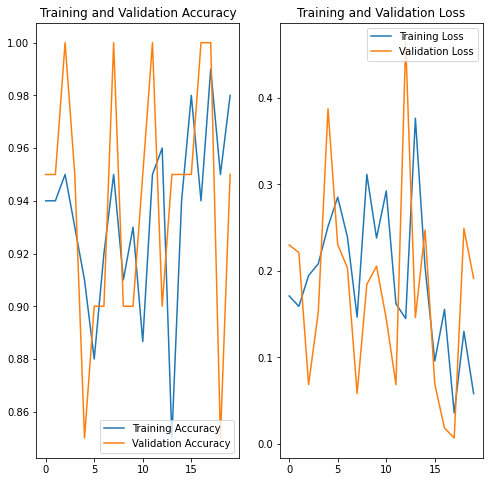

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving datasets_107582_309628_rock_00nKV8oHuTGi20gq.png to datasets_107582_309628_rock_00nKV8oHuTGi20gq (8).png
datasets_107582_309628_rock_00nKV8oHuTGi20gq.png
[0. 1. 0.]
rock


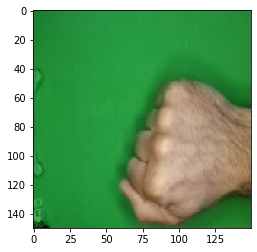

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes[0])
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  else:
    print('scissors') 

   